<a href="https://colab.research.google.com/github/nbrunella19/CIINTI/blob/main/UR_INTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
from IPython.display import FileLink


# Función para seleccionar un archivo
def seleccionar_archivo():
    # Muestra un cuadro de diálogo para cargar un archivo
    uploaded = files.upload()

    # Obtiene la ruta del archivo cargado
    ruta_al_archivo = list(uploaded.keys())[0]

    # Crea un enlace para abrir el archivo
    file_path_i = FileLink(ruta_al_archivo)
    # Muestra el enlace
    # display(file_path_i)
    return (file_path_i)

# Llama a la función para seleccionar un archivo
file_path= str(seleccionar_archivo())

file_path


TypeError: 'NoneType' object is not subscriptable

In [ ]:
import io
import glob
import os
import sys
import traceback                                                                  # to indicate errors and exceptions
import re
import numpy as np
import pandas as pd

def openFile(path2file):
    '''
    openFile
    ___________________
    open the file, returns a list of the lines of path2file.
    It is assumed that path2file is a .mea file (text based)
    out = lines of file (strings)
    input= path
    '''
    try:
        with open(path2file, mode='r') as f:  # to ensure it closes correclty
            lines = f.readlines()
            return lines
    except Exception as exception:
        print("There was a problem opening {}".format(path2file))
        print(exception)
        raise

def read_mea_file(lines_of_mea_file, ln_preface = 81):
    '''
    The function reads and arrange the data list of the file called by openFile.
    Inputs:
        lines_of_mea_file: list of str lines read by openFile()
        ln_preface(optional, default=  81): number of lines in the preface of the measurments file. They appear in all sets of measurements.
    Outputs:
        qlistInit: list containing the set measurement prefaces, eg. qlistInit[2]= preface of measurement 3
        qlist: list containing the set measurements, eg. qlist[2]= measurement set number 3
        qlistFinal: list containing the result resume of the measurement set, eg. qlistFinal[2]= resume of measurement set 3
    To process it is preferable to have all measurements together in the same file.
    Note that it doesn´t matter if the measurements have differet number of points.
    '''
    chunks = []
    qlist = []
    chunksInit =[]
    qlistInit = []
    chunksFinal = []
    qlistFinal = []
    nn = 0
    counter = 0
    ii = 0
    for line in lines_of_mea_file:
        if (nn>ln_preface and line != '\n' and ii == 0):
            chunks.append(line)
            nn += 1
        elif (nn<ln_preface):
            chunksInit.append(line)
            nn +=1
        elif (nn>ln_preface and line == '\n'):
            ii = 1
            nn += 1
        elif (nn>ln_preface and ii == 1 and line != '***\n'):
            chunksFinal.append(line)
            nn += 1
        elif (line =='***\n'):
            ii = 0
            counter += 1
            nn = 0
            qlist.append(chunks)
            qlistInit.append(chunksInit)
            qlistFinal.append(chunksFinal)
            chunks = []
            chunksInit = []
            chunksFinal = []
        else:
            nn += 1
    return qlistInit, qlist, qlistFinal,counter

In [ ]:
lineas = openFile(file_path)
qlistInit, qlist, qlistFinal,counter= read_mea_file(lineas, ln_preface = 81)

In [ ]:
import pandas as pd
e = 20
def create_df_from_list(qlist, n):
    '''
    Create a DataFrame from a list that coming from the .txt
    '''
    df_aux = pd.DataFrame([sub.split(';') for sub in qlist[n]])
    df = df_aux.tail(e)                                               # Recorta la lista a un N° "e" (proximamente programable por el usuario)
    df.columns = ['Ratio', 'Measure', 'Time']
    return df

In [ ]:

df_m = [create_df_from_list(qlist, i) for i in range(counter)]      # I Create a list of DataFrame

for i in range(counter):
    df_m[i]['Time'] = df_m[i]['Time'].str.strip()                      # Le saca el '\n'

df_m


[                   Ratio           Measure         Time
 30       0.0400435339724     4.00435339724  10:26:58 PM
 31       0.0400435368983     4.00435368983  10:27:08 PM
 32  4.00435393891667E-02  4.00435393891667  10:27:18 PM
 33  4.00435413273333E-02  4.00435413273333  10:27:28 PM
 34       0.0400435428155     4.00435428155  10:27:39 PM
 35  4.00435438859667E-02  4.00435438859667  10:27:49 PM
 36  4.00435454095667E-02  4.00435454095667  10:27:59 PM
 37  4.00435477519667E-02  4.00435477519667  10:28:09 PM
 38  4.00435498893333E-02  4.00435498893333  10:28:19 PM
 39  4.00435509482333E-02  4.00435509482333  10:28:29 PM
 40        0.040043551445      4.0043551445  10:28:39 PM
 41  4.00435526536333E-02  4.00435526536333  10:28:49 PM
 42  4.00435550982333E-02  4.00435550982333  10:29:00 PM
 43       0.0400435569594     4.00435569594  10:29:10 PM
 44  4.00435576268333E-02  4.00435576268333  10:29:20 PM
 45       0.0400435587526     4.00435587526  10:29:30 PM
 46        0.040043560238      

In [ ]:
#Acá tengo una lista de los parámetros de las mediciones
#Listado de corrientes
iList=[0]*counter
#Listado de patrones
RsList=[0]*counter
#Listado de Mesurandos
RxList=[0]*counter

for i in range(counter):
  iList[i]= qlistInit[i][22].strip()
  RsList[i]= qlistInit[i][33].strip()
  RxList[i]= qlistInit[i][57].strip()

#iList,RsList,RxList



In [ ]:
def counter_different_values(lista):
    '''
    Accounts for different types of measurement current
    '''
    different_values = set(lista)
    different_quantity = len(different_values)
    return different_quantity

resume = counter_different_values(iList)

#resume

In [ ]:
from datetime import datetime, timedelta

def h_to_seg(h_str):
    '''
    Convert time string to seconds
    '''
    # Intentar formato de 24 horas
    try:
        time_obj = datetime.strptime(h_str, '%H:%M:%S')
    except ValueError:
        # Si falla, intentar formato de 12 horas
        time_obj = datetime.strptime(h_str, '%I:%M:%S %p')

    seconds = time_obj.second + time_obj.minute * 60 + time_obj.hour * 3600
    return seconds

In [ ]:
measure_f=[]  #Lista de mediciones en formato float
tList_h=[]    #Lista de hora en formato "H":"M":"S"
tList_s=[]    #Lista de hora en formato segundos


for i in range(counter):
      # Genero un listado de listas del tipo float
      measure_f.append([float(numero) for numero in df_m[i]["Measure"]])
      # Genero un listado del tipo HMS para poder convertirlo a segundos
      tList_h.append(df_m[i]["Time"].tolist())
      tList_s_aux = [h_to_seg(hora) for hora in tList_h[i]]
      tList_s.append(tList_s_aux)

#tList_h, tList_s



In [ ]:
import matplotlib.pyplot as plt
meas_num=0

t_x = tList_h[meas_num]
r_y = measure_f[meas_num]
r_y_array = np.array(r_y, dtype=float)
r_y_array = r_y_array - r_y_array.mean()




Dropdown(description='Medición:', options=('Medición 1', 'Medición 2', 'Medición 3', 'Medición 4', 'Medición 5…

Button(description='Calcular', style=ButtonStyle())

Button(description='Limpiar', style=ButtonStyle())

Button(description='Ver', style=ButtonStyle())

Label(value='')

Label(value='')

Opción seleccionada: Medición 5


,Ratio,Measure,Time
30,0.0400435819448,4.00435819448,11:08:30 PM
31,0.040043583556,4.0043583556,11:08:40 PM
32,0.0400435855827,4.00435855827,11:08:50 PM
33,0.0400435860949,4.00435860949,11:09:00 PM
34,0.0400435855032,4.00435855032,11:09:11 PM
35,4.00435857750667E-02,4.00435857750667,11:09:21 PM
36,0.040043586948,4.0043586948,11:09:31 PM
37,4.00435876740333E-02,4.00435876740333,11:09:41 PM
38,4.00435876479333E-02,4.00435876479333,11:09:51 PM
39,4.00435875660333E-02,4.00435875660333,11:10:02 PM


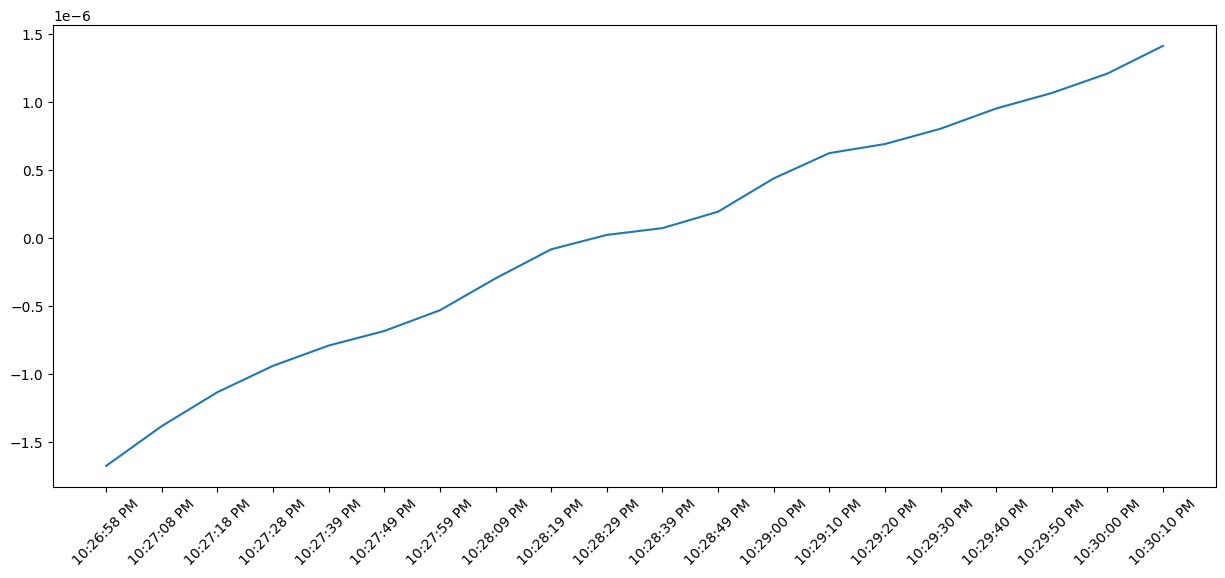

In [ ]:
import ipywidgets as widgets
from IPython.display import display

flag=1
index=0

############################################ Opciones para el menú desplegable ############################################################
counter_m = []
for i in range(counter):
  counter_m.append("Medición "+str(i+1))
counter_mv = {opcion: i + 1 for i, opcion in enumerate(counter_m)}

def handle_dropdown_change(change):
    global index
    opcion_seleccionada = change.new
    index = counter_mv[opcion_seleccionada]-1
    print(f"Opción seleccionada: {opcion_seleccionada}")
    display(df_m[index])
                                           # Crear el menú desplegable
menu_desplegable = widgets.Dropdown(
    options=counter_m,
    value=counter_m[0],  # Valor predeterminado seleccionado
    description='Medición:')

############################################################################################################################################
################################################# Funciones para Botones  ##################################################################
def on_button_click(b):
    sd=np.std(measure_f[index])    # sd es el desvío estándar (standard deviation )
    am=np.mean(measure_f[index])   # am es el valor promedio medido (average measure)
    output_text1.value = "El valor medio calculado es:"+str(am)
    output_text2.value = "La incertidumbre calculada es:"+str(sd)


def on_button2_click(b):
    global flag
    output_text1.value = ''
    output_text2.value = ''


def on_button3_click(b):
    plt.figure(figsize=(15,6))
    plt.xticks(rotation=45)
    display(plt.plot(t_x, r_y_array))

############################################################################################################################################

# Crear widgets
output_text1 = widgets.Label(value='')
output_text2 = widgets.Label(value='')


button = widgets.Button(description="Calcular")
button2 = widgets.Button(description="Limpiar")
button3 = widgets.Button(description="Ver")

# Configurar la función a llamar cuando se hace clic en el botón
button.on_click(on_button_click)
button2.on_click(on_button2_click)
button3.on_click(on_button3_click)
# Conectar la función al evento de cambio en el menú desplegable
menu_desplegable.observe(handle_dropdown_change, names='value')

# Mostrar los widgets

display(menu_desplegable)
display(button)
display(button2)
display(button3)
display(output_text1)
display(output_text2)


